# Demonstrate Stata in Jupyter Notebooks

More information:

https://kylebarron.github.io/stata_kernel/getting_started/

In [1]:
set more off
clear all
set linesize 100
sysuse auto





(1978 Automobile Data)


In [2]:
desc


Contains data from /Applications/Stata/ado/base/a/auto.dta
  obs:            74                          1978 Automobile Data
 vars:            12                          13 Apr 2016 17:45
 size:         3,182                          (_dta has notes)
----------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
----------------------------------------------------------------------------------------------------
make            str18   %-18s                 Make and Model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair Record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)
length         

In [3]:
reg mpg c.weight##c.weight##i.foreign


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(5, 68)        =     31.82
       Model |  1711.80587         5  342.361174   Prob > F        =    0.0000
    Residual |  731.653589        68  10.7596116   R-squared       =    0.7006
-------------+----------------------------------   Adj R-squared   =    0.6785
       Total |  2443.45946        73  33.4720474   Root MSE        =    3.2802

-------------------------------------------------------------------------------------------
                      mpg |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------------------+----------------------------------------------------------------
                   weight |  -.0131718   .0047681    -2.76   0.007    -.0226864   -.0036571
                          |
        c.weight#c.weight |   1.11e-06   7.30e-07     1.52   0.132    -3.44e-07    2.57e-06
                          |
        

In [4]:
qui margins, at(weight=(1000(500)4800) foreign=(0 1))

. marginsplot, noci scheme(lean2wide) title(Predicted margins of miles per gall
> on by vehicle weight) ytitle(Miles Per Gallon) xtitle(Vehicle Weight in Pound
> s)

  Variables that uniquely identify margins: weight foreign

. noi gr export /Users/adamnelson/.stata_kernel_cache/graph${stata_kernel_graph
> _counter}.svg, width(600) replace        


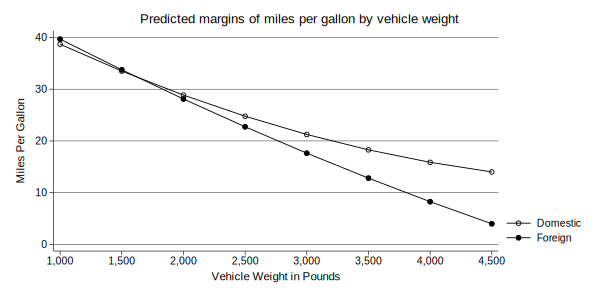



. global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1        


In [5]:
marginsplot, noci scheme(lean2wide) ///
title(Predicted margins of miles per gallon by vehicle weight) ///
ytitle(Miles Per Gallon) xtitle(Vehicle Weight in Pounds)

In [6]:
bysort foreign: sum mpg


----------------------------------------------------------------------------------------------------
-> foreign = Domestic

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         52    19.82692    4.743297         12         34

----------------------------------------------------------------------------------------------------
-> foreign = Foreign

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         22    24.77273    6.611187         14         41



In [7]:
sum weight


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      weight |         74    3019.459    777.1936       1760       4840
